In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 28.8 MB/s eta 0:00:00


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
dataset_location = "/content/drive/MyDrive/Food_Portion_Benchmark"
for split in ["train/images","val/images","test/images"]:
    path = os.path.join(dataset_location, split)
    print(split, "exists:", os.path.exists(path), "files:", len(os.listdir(path)) if os.path.exists(path) else 0)

train/images exists: True files: 1021
val/images exists: True files: 292
test/images exists: True files: 146


In [6]:
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt

--2026-02-24 06:52:39--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/99db71db-0946-4c10-94a0-b54baf471037?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-24T07%3A38%3A41Z&rscd=attachment%3B+filename%3Dyolov12n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-24T06%3A37%3A48Z&ske=2026-02-24T07%3A38%3A41Z&sks=b&skv=2018-11-09&sig=O%2FRR3D8TMW9CsDu0ATNAtRdqFNzmOEBsVRP7iJsxr4Q%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc3MTkxNjI1OSwibmJmIjoxNzcxOTE1OTU5LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9i

In [7]:
from ultralytics import YOLO
model = YOLO("yolov12n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
dataset_location = "/content/drive/MyDrive/Food_Portion_Benchmark"
result = model.train(
    data = f"{dataset_location}/data.yaml",
    epochs = 10,
    batch = 16,
    imgsz = 640,
    exist_ok = True,
    patience = 5,
    save_period = 1,
    val = True,
    verbose = True,
    flipud = 0.5
)

Ultralytics 8.4.15 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Food_Portion_Benchmark/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

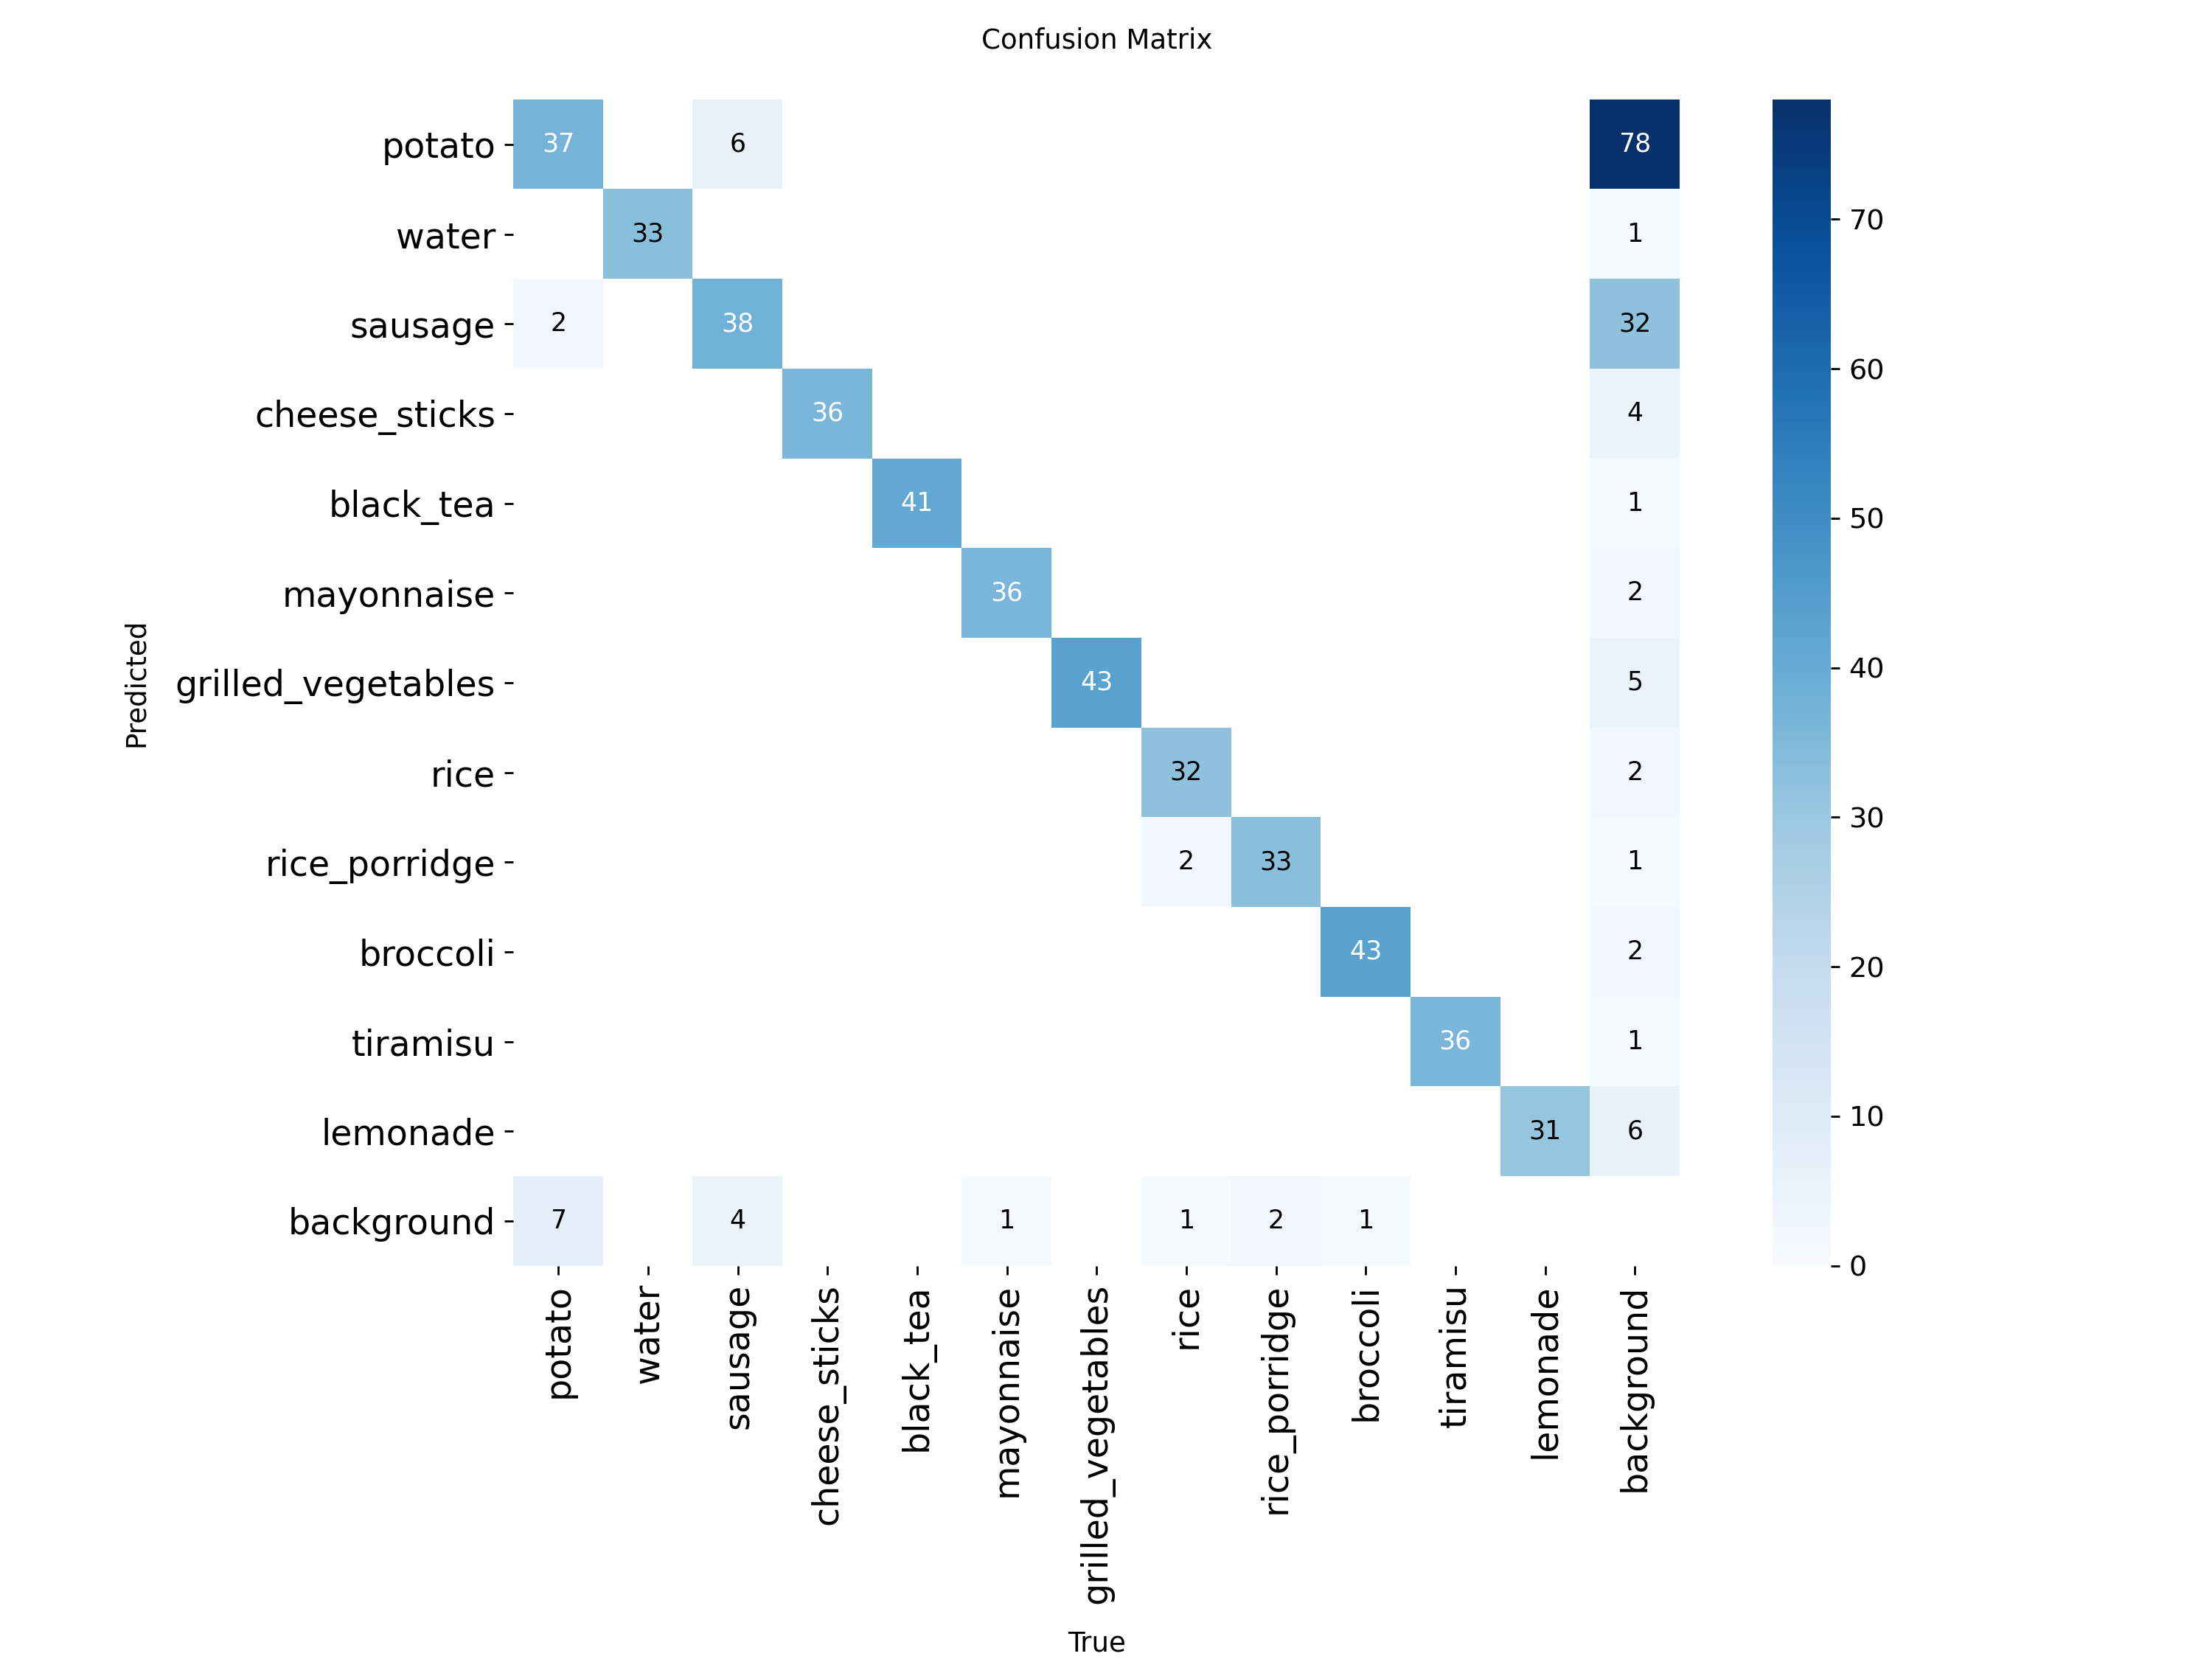

In [9]:
from IPython.display import Image
Image(filename = f"{HOME}/runs/detect/train/confusion_matrix.png", width = 1000)

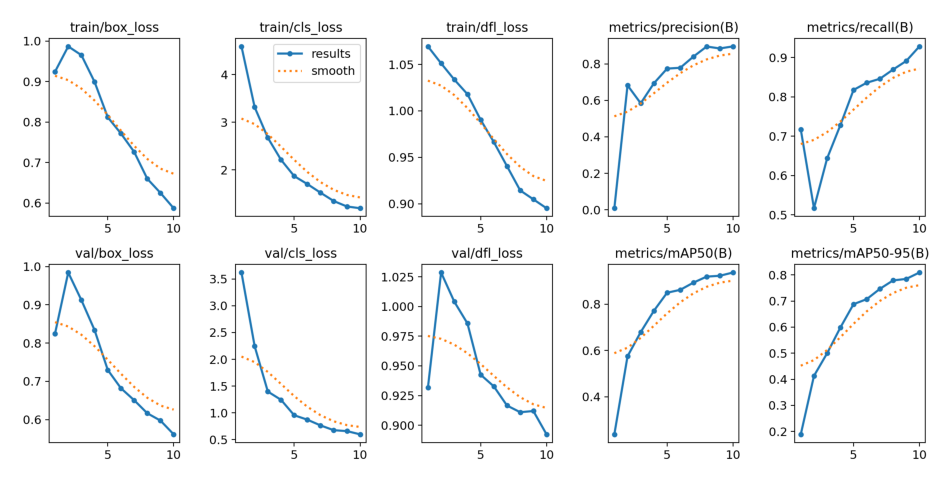

In [10]:
import matplotlib.pyplot as plt

results_dir = "/content/runs/detect/train"
plots = ['results.png', 'metrics.png']

for plot in plots:
    path = os.path.join(results_dir, plot)
    if os.path.exists(path):
        img = plt.imread(path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.show()


In [13]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/train/images",
    annotations_directory_path=f"{dataset_location}/train/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

ds.classes


['potato',
 'water',
 'sausage',
 'cheese_sticks',
 'black_tea',
 'mayonnaise',
 'grilled_vegetables',
 'rice',
 'rice_porridge',
 'broccoli',
 'tiramisu',
 'lemonade']

In [14]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f"{HOME}/runs/detect/train/weights/best.pt")

predictions = []
targets = []

for _, image, target in ds:
  results = model(image, verbose = False)
  detections = sv.Detections.from_ultralytics(results)

  predictions.append(detections)
  targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [15]:
from shutil import copyfile

path_drive = "/content/drive/MyDrive/best.pt"
copyfile("/content/runs/detect/train/weights/best.pt", path_drive)
print("Best.pt berhasil dicopy ke Google Drive!")


Best.pt berhasil dicopy ke Google Drive!
